# Just upload this ipynb file in google colan and run it.


Getting the dataset

In [ ]:
!wget -O /content/Data https://www.dropbox.com/scl/fi/z2l626nyon4gb6apt8lly/Assessment-Data-data.csv?rlkey=c9az5e86nyy8ucbpql1e2x99q&st=defnuo9u&dl=0

--2025-09-27 19:04:05--  https://www.dropbox.com/scl/fi/z2l626nyon4gb6apt8lly/Assessment-Data-data.csv?rlkey=c9az5e86nyy8ucbpql1e2x99q
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://uc00647d5da176a90125a34721bc.dl.dropboxusercontent.com/cd/0/inline/CyIPKb7q_Hdy3Ia_G4W5L9gaQz8FMBypPaKejhfZNC77yzeHx7SRXjO5jDZiso3XMZhlTDnPuKWzUUpMNah-eP3V8gEfG4pZegaeZzVVRrGbaTs-AW5FJiE8JD7ij3dA-Q0bJWC4oxOYCjfFerk7-Xuc/file# [following]
--2025-09-27 19:04:06--  https://uc00647d5da176a90125a34721bc.dl.dropboxusercontent.com/cd/0/inline/CyIPKb7q_Hdy3Ia_G4W5L9gaQz8FMBypPaKejhfZNC77yzeHx7SRXjO5jDZiso3XMZhlTDnPuKWzUUpMNah-eP3V8gEfG4pZegaeZzVVRrGbaTs-AW5FJiE8JD7ij3dA-Q0bJWC4oxOYCjfFerk7-Xuc/file
Resolving uc00647d5da176a90125a34721bc.dl.dropboxusercontent.com (uc00647d5da176a90125a34721bc.dl.dropboxusercontent.com)... 162.125.

Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as stats
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/Data')
df

,login,ticket,symbol,type,open_time,close_time,open_price,close_price,stop loss,take profit,pips,reason,volume,profit
0,11173702,47345780,XAUUSD,Buy,2024.07.30 11:05:29,7/31/2024 7:58,2391.28000,2420.69000,2367.62000,2420.640,2936.0,4,190,5578.40
1,11173702,47718163,XAUUSD,Buy,2024.07.31 09:46:04,7/31/2024 21:42,2421.81000,2431.41000,2399.23000,2431.410,960.0,4,200,1920.00
2,11173702,50360070,XAUUSD,Sell,2024.08.13 13:03:27,8/14/2024 15:24,2460.93000,2472.80000,2480.93000,2451.370,-1199.0,0,200,-2398.00
3,11173702,51120570,XAUUSD,Buy,2024.08.19 13:27:40,8/19/2024 16:37,2495.80000,2485.65000,2485.71000,2508.160,-1012.0,3,190,-1922.80
4,11173702,52180073,XAUUSD,Sell,2024.08.28 02:30:32,8/28/2024 15:29,2526.53000,2496.42000,2537.07000,2496.820,2971.0,4,189,5615.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59312,2145732336,2412502,NZDUSD,sell,2024.11.07 11:23:51,2024.11.07 15:08:46,0.59964,0.60140,0.60140,0.590,-17.6,5,3,-5.28
59313,2145732336,2426484,GBPNZD,buy,2024.11.11 14:41:30,2024.11.11 21:19:38,2.15926,2.15841,2.15704,2.171,-8.5,5,2,-1.02
59314,2145732336,2433467,GBPNZD,buy,2024.11.12 15:30:58,2024.11.12 21:35:38,2.15519,2.15128,2.14945,2.175,-39.1,5,2,-4.63
59315,2145732336,2437184,EURGBP,sell,2024.11.13 09:40:04,2024.11.13 11:58:59,0.83259,0.83350,0.83350,0.827,-9.1,5,3,-3.48


In [ ]:
#column name
print(df.columns)


#uniques
num_unique = df['symbol'].value_counts()
num_unique

Index(['login', 'ticket', 'symbol', 'type', 'open_time', 'close_time',
       'open_price', 'close_price', 'stop loss', 'take profit', 'pips',
       'reason', 'volume', 'profit'],
      dtype='object')


,count
symbol,
XAUUSD,28887
EURUSD,6196
US30,4313
GBPUSD,3133
NDX100,2577
...,...
AUDSGD,2
MXNJPY,2
NTH25,2


# Data Cleaning

In [ ]:
#breaking the open_time & close_time in separte columns

df['open_time']  = pd.to_datetime(df['open_time'], errors='coerce', infer_datetime_format=True)
df['open_time_year']   = df['open_time'].dt.year
df['open_time_month']  = df['open_time'].dt.month
df['open_time_day']    = df['open_time'].dt.day
df['open_time_hour']   = df['open_time'].dt.hour
df['open_time_minute'] = df['open_time'].dt.minute
df['open_time_second'] = df['open_time'].dt.second



#for closing time it has mixed format so creating a special function for this

def parse_close_time(x):
    for fmt in ("%Y.%m.%d %H:%M:%S", "%m/%d/%Y %H:%M", "%Y-%m-%d %H:%M:%S"):
        try:
            return pd.to_datetime(x, format=fmt)
        except:
            continue
    return pd.NaT

#applying func

df['close_time'] = df['close_time'].apply(parse_close_time)

# Extract parts
df['close_time_year']   = df['close_time'].dt.year
df['close_time_month']  = df['close_time'].dt.month
df['close_time_day']    = df['close_time'].dt.day
df['close_time_hour']   = df['close_time'].dt.hour
df['close_time_minute'] = df['close_time'].dt.minute
df['close_time_second'] = df['close_time'].dt.second



/tmp/ipython-input-2979472845.py:3: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['open_time']  = pd.to_datetime(df['open_time'], errors='coerce', infer_datetime_format=True)


In [ ]:
#updated dataframe

df

,login,ticket,symbol,type,open_time,close_time,open_price,close_price,stop loss,take profit,...,open_time_day,open_time_hour,open_time_minute,open_time_second,close_time_year,close_time_month,close_time_day,close_time_hour,close_time_minute,close_time_second
0,11173702,47345780,XAUUSD,Buy,2024-07-30 11:05:29,2024-07-31 07:58:00,2391.28000,2420.69000,2367.62000,2420.640,...,30,11,5,29,2024,7,31,7,58,0
1,11173702,47718163,XAUUSD,Buy,2024-07-31 09:46:04,2024-07-31 21:42:00,2421.81000,2431.41000,2399.23000,2431.410,...,31,9,46,4,2024,7,31,21,42,0
2,11173702,50360070,XAUUSD,Sell,2024-08-13 13:03:27,2024-08-14 15:24:00,2460.93000,2472.80000,2480.93000,2451.370,...,13,13,3,27,2024,8,14,15,24,0
3,11173702,51120570,XAUUSD,Buy,2024-08-19 13:27:40,2024-08-19 16:37:00,2495.80000,2485.65000,2485.71000,2508.160,...,19,13,27,40,2024,8,19,16,37,0
4,11173702,52180073,XAUUSD,Sell,2024-08-28 02:30:32,2024-08-28 15:29:00,2526.53000,2496.42000,2537.07000,2496.820,...,28,2,30,32,2024,8,28,15,29,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59312,2145732336,2412502,NZDUSD,sell,2024-11-07 11:23:51,2024-11-07 15:08:46,0.59964,0.60140,0.60140,0.590,...,7,11,23,51,2024,11,7,15,8,46
59313,2145732336,2426484,GBPNZD,buy,2024-11-11 14:41:30,2024-11-11 21:19:38,2.15926,2.15841,2.15704,2.171,...,11,14,41,30,2024,11,11,21,19,38
59314,2145732336,2433467,GBPNZD,buy,2024-11-12 15:30:58,2024-11-12 21:35:38,2.15519,2.15128,2.14945,2.175,...,12,15,30,58,2024,11,12,21,35,38
59315,2145732336,2437184,EURGBP,sell,2024-11-13 09:40:04,2024-11-13 11:58:59,0.83259,0.83350,0.83350,0.827,...,13,9,40,4,2024,11,13,11,58,59


In [ ]:
#dropping open_time and close_time cols

df = df.drop(columns=['open_time', 'close_time'])

In [ ]:
df.nunique()

,0
login,600
ticket,59279
symbol,63
type,4
open_price,39828
close_price,35853
stop loss,23025
take profit,19100
pips,11639
reason,8


In [ ]:
#storing the original dataset

df_1 = df.copy()

In [ ]:
#making all string column to lower case

df_1 = df_1.applymap(lambda x: x.lower() if isinstance(x, str) else x)

/tmp/ipython-input-2631300091.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_1 = df_1.applymap(lambda x: x.lower() if isinstance(x, str) else x)


In [ ]:
df_1.head()

,login,ticket,symbol,type,open_price,close_price,stop loss,take profit,pips,reason,...,open_time_day,open_time_hour,open_time_minute,open_time_second,close_time_year,close_time_month,close_time_day,close_time_hour,close_time_minute,close_time_second
0,11173702,47345780,xauusd,buy,2391.28,2420.69,2367.62,2420.64,2936.0,4,...,30,11,5,29,2024,7,31,7,58,0
1,11173702,47718163,xauusd,buy,2421.81,2431.41,2399.23,2431.41,960.0,4,...,31,9,46,4,2024,7,31,21,42,0
2,11173702,50360070,xauusd,sell,2460.93,2472.80,2480.93,2451.37,-1199.0,0,...,13,13,3,27,2024,8,14,15,24,0
3,11173702,51120570,xauusd,buy,2495.80,2485.65,2485.71,2508.16,-1012.0,3,...,19,13,27,40,2024,8,19,16,37,0
4,11173702,52180073,xauusd,sell,2526.53,2496.42,2537.07,2496.82,2971.0,4,...,28,2,30,32,2024,8,28,15,29,0


In [ ]:
#checking null values

null_counts = df_1.isnull().sum()
null_counts

,0
login,0
ticket,0
symbol,0
type,0
open_price,0
close_price,0
stop loss,0
take profit,0
pips,0
reason,0


In [ ]:
#separating the Symbol data column into 2 parts since it indidcates two rates

df_1['symbol_1'] = df_1['symbol'].str[:3]

df_1['symbol_2'] = df_1['symbol'].str[-3:]

print(df_1[['symbol', 'symbol_1', 'symbol_2']].head())

   symbol symbol_1 symbol_2
0  xauusd      xau      usd
1  xauusd      xau      usd
2  xauusd      xau      usd
3  xauusd      xau      usd
4  xauusd      xau      usd


In [ ]:
#label encoding the string column

from sklearn.preprocessing import LabelEncoder

categorical_cols = ['type', 'login', 'symbol_1', 'symbol_2', 'symbol']

encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df_1[col + '_encoded'] = le.fit_transform(df_1[col])

    # Store mapping for later use
    mapping = dict(zip(le.transform(le.classes_), le.classes_))
    encoders[col] = mapping
    print(f"{col} mapping: {mapping}")


df_1 = df_1.drop(columns=categorical_cols)

type mapping: {np.int64(0): 'buy', np.int64(1): 'sell'}
login mapping: {np.int64(0): np.int64(11173702), np.int64(1): np.int64(11178446), np.int64(2): np.int64(11180486), np.int64(3): np.int64(11189053), np.int64(4): np.int64(11191905), np.int64(5): np.int64(11192001), np.int64(6): np.int64(11199499), np.int64(7): np.int64(11201824), np.int64(8): np.int64(11202254), np.int64(9): np.int64(11205614), np.int64(10): np.int64(11207234), np.int64(11): np.int64(11210003), np.int64(12): np.int64(11212738), np.int64(13): np.int64(11218688), np.int64(14): np.int64(11222670), np.int64(15): np.int64(13003585), np.int64(16): np.int64(13003670), np.int64(17): np.int64(13007772), np.int64(18): np.int64(13010989), np.int64(19): np.int64(13011366), np.int64(20): np.int64(13011838), np.int64(21): np.int64(13018051), np.int64(22): np.int64(13018056), np.int64(23): np.int64(13018096), np.int64(24): np.int64(13028247), np.int64(25): np.int64(13029181), np.int64(26): np.int64(13036517), np.int64(27): np.int

In [ ]:
df_1.head(10)

,ticket,open_price,close_price,stop loss,take profit,pips,reason,volume,profit,open_time_year,...,close_time_month,close_time_day,close_time_hour,close_time_minute,close_time_second,type_encoded,login_encoded,symbol_1_encoded,symbol_2_encoded,symbol_encoded
0,47345780,2391.28,2420.69,2367.62,2420.64,2936.0,4,190,5578.40,2024,...,7,31,7,58,0,0,0,28,21,57
1,47718163,2421.81,2431.41,2399.23,2431.41,960.0,4,200,1920.00,2024,...,7,31,21,42,0,0,0,28,21,57
2,50360070,2460.93,2472.80,2480.93,2451.37,-1199.0,0,200,-2398.00,2024,...,8,14,15,24,0,1,0,28,21,57
3,51120570,2495.80,2485.65,2485.71,2508.16,-1012.0,3,190,-1922.80,2024,...,8,19,16,37,0,0,0,28,21,57
4,52180073,2526.53,2496.42,2537.07,2496.82,2971.0,4,189,5615.19,2024,...,8,28,15,29,0,1,0,28,21,57
5,52365859,2518.25,2524.44,2524.52,2509.65,-634.0,3,200,-1268.00,2024,...,8,29,12,53,0,1,0,28,21,57
6,52638929,2501.33,2491.58,2519.00,2491.58,975.0,4,199,1940.25,2024,...,9,3,4,13,0,1,0,28,21,57
7,52745364,2495.73,2475.59,2475.57,2513.74,-2025.0,3,200,-4050.00,2024,...,9,3,17,19,0,0,0,28,21,57
8,53330276,2497.30,2528.54,2475.84,2528.37,3107.0,4,190,5903.30,2024,...,9,11,9,40,0,0,0,28,21,57
9,54456088,2630.72,2646.60,2646.64,2619.43,-1592.0,3,190,-3024.80,2024,...,9,24,17,53,0,1,0,28,21,57


In [ ]:
#check for duplicates

num_duplicates = df_1.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 0


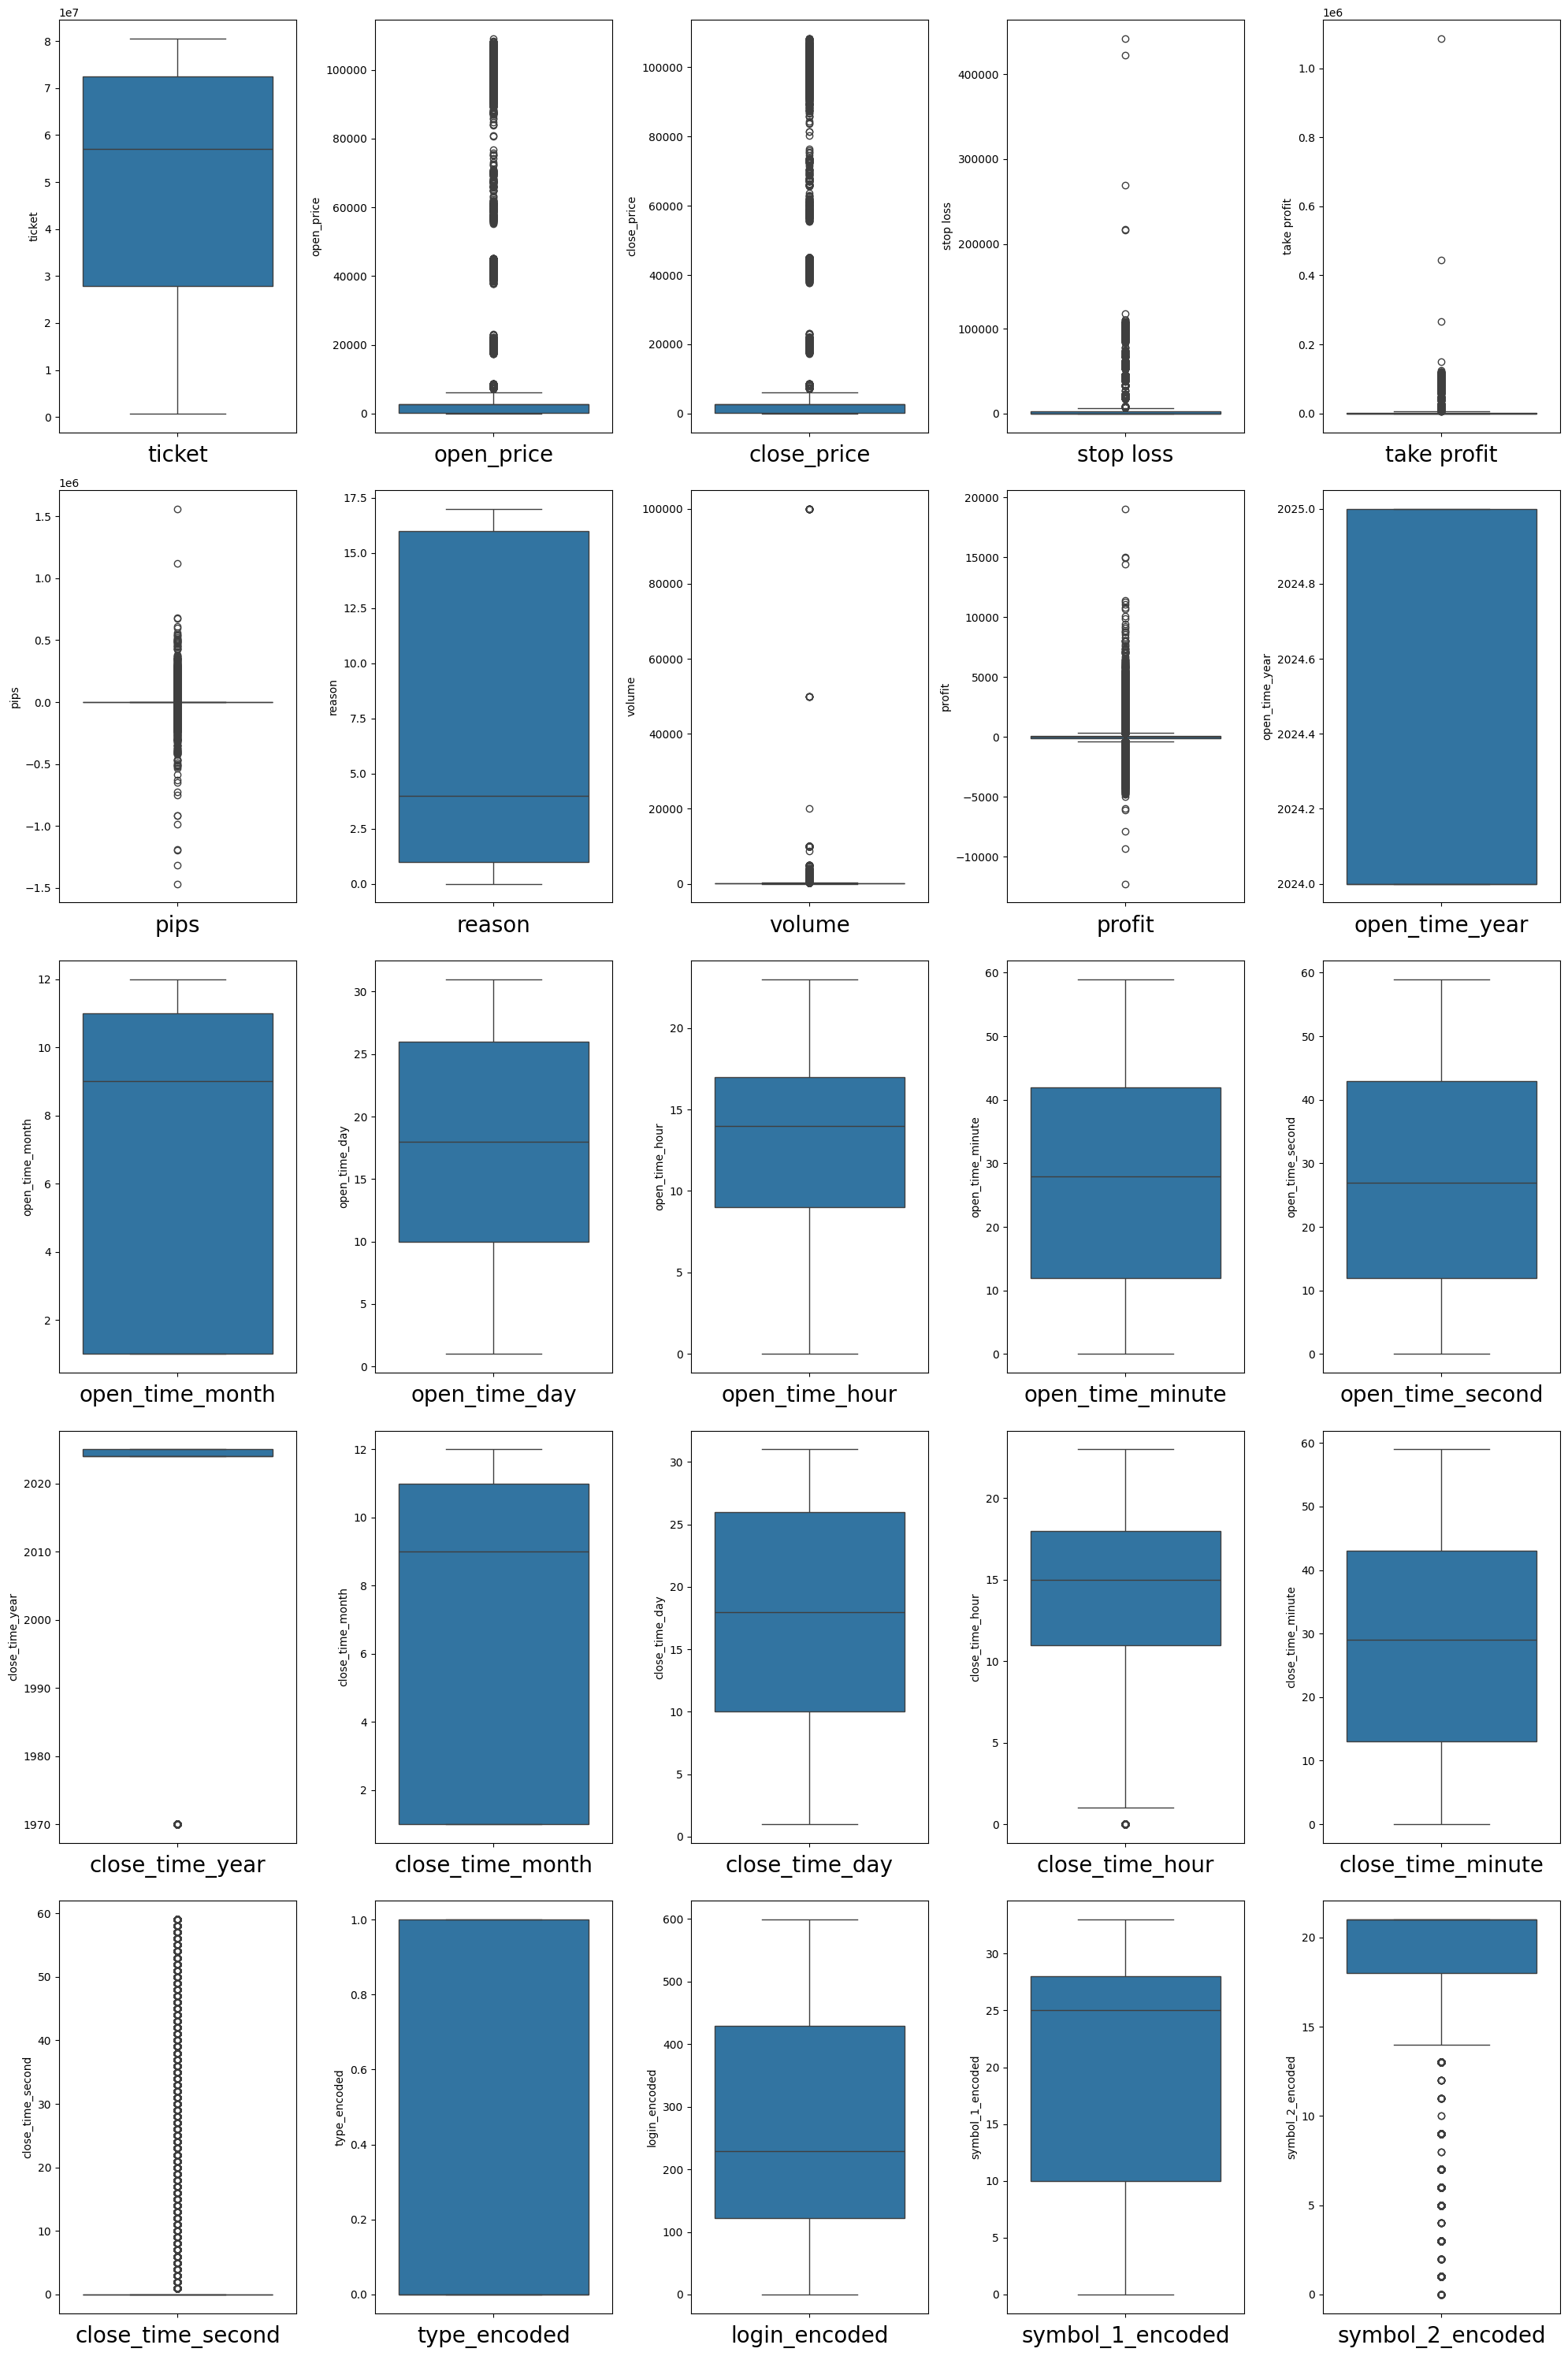

In [ ]:
#check for outliers

import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(20, 30), facecolor='white')
plotnumber = 1

for column in df_1.columns:
    if plotnumber <= 25:
        ax = plt.subplot(5, 5, plotnumber)
        sns.boxplot(df_1[column])
        plt.xlabel(column, fontsize=20)

    plotnumber += 1

plt.tight_layout()
plt.show()

In [ ]:
#data description

df_1.describe()

,ticket,open_price,close_price,stop loss,take profit,pips,reason,volume,profit,open_time_year,...,close_time_month,close_time_day,close_time_hour,close_time_minute,close_time_second,type_encoded,login_encoded,symbol_1_encoded,symbol_2_encoded,symbol_encoded
count,5.931700e+04,59317.000000,59317.000000,59317.000000,5.931700e+04,5.931700e+04,59317.000000,59317.000000,59317.000000,59317.000000,...,59317.000000,59317.000000,59317.000000,59317.000000,59317.000000,59317.000000,59317.000000,59317.000000,59317.000000,59317.000000
mean,4.820009e+07,9247.848230,9249.311204,6119.568535,4.895936e+03,1.115243e+02,7.236711,176.008463,22.606170,2024.446314,...,6.390765,17.716439,13.979382,28.389551,5.615692,0.448455,269.175110,20.245461,18.107642,42.089704
std,2.781208e+07,20700.786785,20702.285285,17961.190194,1.736828e+04,3.093160e+04,6.774457,1768.198799,687.227407,0.497114,...,4.931751,8.947783,5.321582,17.466025,13.762237,0.497340,175.311941,9.361616,5.568406,17.510456
min,7.631230e+05,0.308400,0.325050,0.000000,0.000000e+00,-1.465680e+06,0.000000,1.000000,-12250.000000,2024.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.785692e+07,70.730000,70.940000,0.000000,0.000000e+00,-1.890000e+02,1.000000,20.000000,-102.000000,2024.000000,...,1.000000,10.000000,11.000000,13.000000,0.000000,0.000000,122.000000,10.000000,18.000000,25.000000
50%,5.709664e+07,2645.190000,2645.790000,1.248030,9.317200e-01,7.200000e+00,4.000000,51.000000,2.000000,2024.000000,...,9.000000,18.000000,15.000000,29.000000,0.000000,0.000000,229.000000,25.000000,21.000000,51.000000
75%,7.241683e+07,2755.480000,2755.220000,2667.400000,2.648650e+03,2.430000e+02,16.000000,150.000000,81.860000,2025.000000,...,11.000000,26.000000,18.000000,43.000000,0.000000,1.000000,429.000000,28.000000,21.000000,57.000000
max,8.051714e+07,109111.000000,108304.000000,442230.000000,1.085760e+06,1.560000e+06,17.000000,100000.000000,19061.100000,2025.000000,...,12.000000,31.000000,23.000000,59.000000,59.000000,1.000000,599.000000,33.000000,21.000000,62.000000


#Check for profitable logins (click on the picuture)



Total profit of top 10 most profitable logins: 291508.07
Total profit of top 10 least profitable logins: -114355.67
Top 10 Most Profitable Logins:
     login_encoded  login_name    profit
396            396    13378390  53891.98
511            511    55009560  28475.44
50              50    13088202  27848.61
146            146    13205503  27049.34
40              40    13070589  27023.68
498            498    55008451  27021.14
147            147    13205506  26494.85
370            370    13361147  25136.16
0                0    11173702  24301.54
519            519    55010677  24265.33

Top 10 Least Profitable Logins:
     login_encoded  login_name    profit
61              61    13103928 -14778.82
329            329    13333728 -13868.00
539            539    55011482 -12215.00
23              23    13018096 -12194.31
193            193    13251499 -11405.24
462            462    13410127 -10571.86
507            507    55009211 -10102.92
226            226    13276691 -10010.77


/tmp/ipython-input-330262761.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='login_name', y='profit', data=top10_most, palette='Greens')
/tmp/ipython-input-330262761.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='login_name', y='profit', data=top10_least, palette='Reds')
/tmp/ipython-input-330262761.py:46: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


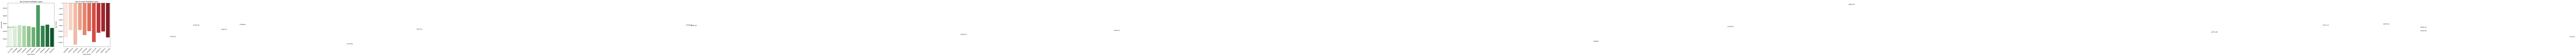

In [ ]:
df_1['login_name'] = df_1['login_encoded'].map(encoders['login'])

# Group by login_encoded and sum profit
profit_per_login = df_1.groupby('login_encoded')['profit'].sum().reset_index()
profit_per_login['login_name'] = profit_per_login['login_encoded'].map(encoders['login'])

# Sort to get top and bottom 10
top10_most = profit_per_login.sort_values(by='profit', ascending=False).head(10)
top10_least = profit_per_login.sort_values(by='profit', ascending=True).head(10)

# Total profit
total_top10_most = top10_most['profit'].sum()
total_top10_least = top10_least['profit'].sum()
print(f"Total profit of top 10 most profitable logins: {total_top10_most}")
print(f"Total profit of top 10 least profitable logins: {total_top10_least}")

# Print tables
print("Top 10 Most Profitable Logins:")
print(top10_most[['login_encoded', 'login_name', 'profit']])
print("\nTop 10 Least Profitable Logins:")
print(top10_least[['login_encoded', 'login_name', 'profit']])

# Visualization
plt.figure(figsize=(14,6))

# Most profitable
plt.subplot(1, 2, 1)
sns.barplot(x='login_name', y='profit', data=top10_most, palette='Greens')
plt.title('Top 10 Most Profitable Logins')
plt.xlabel('Login Name')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)
for i, row in top10_most.iterrows():
    plt.text(i, row['profit'], round(row['profit'], 2), ha='center', va='bottom')

# Least profitable
plt.subplot(1, 2, 2)
sns.barplot(x='login_name', y='profit', data=top10_least, palette='Reds')
plt.title('Top 10 Least Profitable Logins')
plt.xlabel('Login Name')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)
for i, row in top10_least.iterrows():
    plt.text(i, row['profit'], round(row['profit'], 2), ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [ ]:
#Cumulative profit by login and ranks


cumulative_profit = df_1.groupby('login_encoded')['profit'].sum().reset_index()

cumulative_profit['login_name'] = cumulative_profit['login_encoded'].map(encoders['login'])

cumulative_profit['rank'] = cumulative_profit['profit'].rank(method='first', ascending=False).astype(int)

cumulative_profit = cumulative_profit.sort_values(by='rank')

cumulative_profit[['login_encoded', 'login_name', 'profit', 'rank']]

,login_encoded,login_name,profit,rank
396,396,13378390,53891.98,1
511,511,55009560,28475.44,2
50,50,13088202,27848.61,3
146,146,13205503,27049.34,4
40,40,13070589,27023.68,5
...,...,...,...,...
193,193,13251499,-11405.24,596
23,23,13018096,-12194.31,597
539,539,55011482,-12215.00,598
329,329,13333728,-13868.00,599


Top 5 logins (by cumulative profit): [13378390, 55009560, 13088202, 13205503, 13070589]


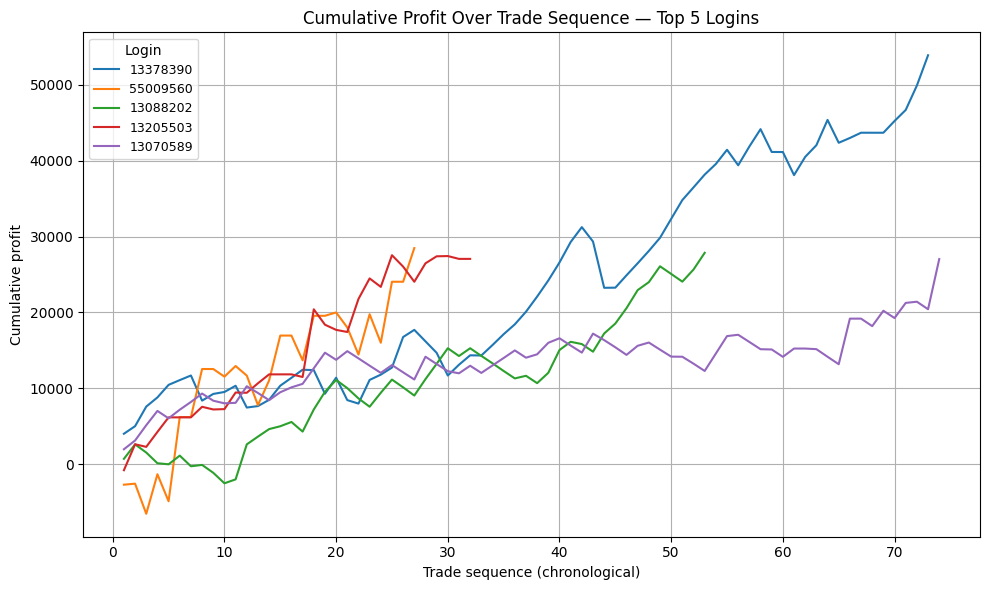

In [ ]:
#profit over trade sequence

df = pd.read_csv('/content/Data')

profit_by_login = df.groupby('login')['profit'].sum().sort_values(ascending=False)
top5_logins = profit_by_login.head(5).index.tolist()
print("Top 5 logins (by cumulative profit):", top5_logins)

def sorted_trades_for_login(df, login_id):
    sub = df[df['login'] == login_id].copy()

    if 'close_time' in sub.columns and not sub['close_time'].isnull().all():
        sub = sub.sort_values('close_time')
    elif 'open_time' in sub.columns and not sub['open_time'].isnull().all():
        sub = sub.sort_values('open_time')
    else:
        sub = sub.sort_index()
    return sub


cum_series = {}
for lg in top5_logins:
    trades = sorted_trades_for_login(df, lg)

    trades = trades.dropna(subset=['profit'])
    cum_profit = trades['profit'].cumsum().reset_index(drop=True)
    cum_series[lg] = cum_profit


plt.figure(figsize=(10, 6))
for lg, series in cum_series.items():
    plt.plot(series.index + 1, series.values, label=str(lg))

plt.xlabel("Trade sequence (chronological)")
plt.ylabel("Cumulative profit")
plt.title("Cumulative Profit Over Trade Sequence — Top 5 Logins")
plt.grid(True)
plt.legend(title="Login", fontsize=9)
plt.tight_layout()



Least 5 logins (by cumulative profit): [13103928, 13333728, 55011482, 13018096, 13251499]


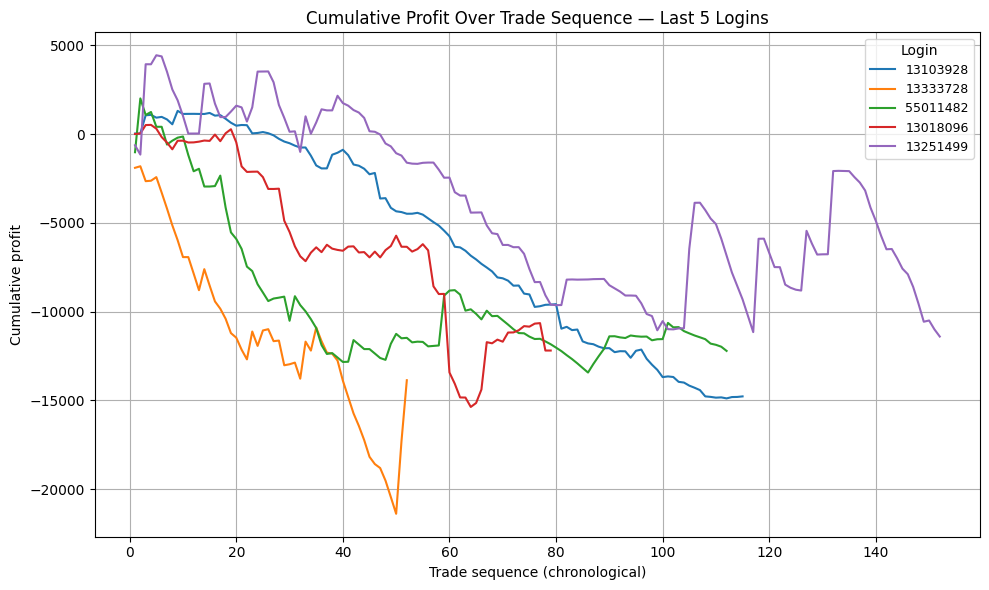

In [ ]:
#least 5 profit

profit_by_login = df.groupby('login')['profit'].sum().sort_values(ascending=True)
top5_logins = profit_by_login.head(5).index.tolist()
print("Least 5 logins (by cumulative profit):", top5_logins)


def sorted_trades_for_login(df, login_id):
    sub = df[df['login'] == login_id].copy()
    if 'close_time' in sub.columns and not sub['close_time'].isnull().all():
        sub = sub.sort_values('close_time')
    elif 'open_time' in sub.columns and not sub['open_time'].isnull().all():
        sub = sub.sort_values('open_time')
    else:
        sub = sub.sort_index()
    return sub

cum_series = {}
for lg in top5_logins:
    trades = sorted_trades_for_login(df, lg)

    trades = trades.dropna(subset=['profit'])
    cum_profit = trades['profit'].cumsum().reset_index(drop=True)
    cum_series[lg] = cum_profit

# --- Plot ---
plt.figure(figsize=(10, 6))
for lg, series in cum_series.items():
    plt.plot(series.index + 1, series.values, label=str(lg))

plt.xlabel("Trade sequence (chronological)")
plt.ylabel("Cumulative profit")
plt.title("Cumulative Profit Over Trade Sequence — Last 5 Logins")
plt.grid(True)
plt.legend(title="Login", fontsize=9)
plt.tight_layout()


## pearson and spear co-relation for numerical features againts profits

              feature  pearson_corr      pearson_p  spearman_corr  \
5                pips      0.137911  1.102509e-249       0.874052   
6              reason      0.079314   2.160075e-83       0.139885   
20       type_encoded     -0.021194   2.438110e-07      -0.027050   
17    close_time_hour      0.015996   9.774756e-05       0.045578   
11     open_time_hour     -0.012215   2.930127e-03       0.005882   
3           stop loss     -0.012062   3.305692e-03      -0.078743   
7              volume      0.011749   4.216159e-03      -0.040048   
0              ticket      0.009388   2.223038e-02      -0.015365   
1          open_price     -0.009115   2.642280e-02       0.015591   
2         close_price     -0.008343   4.215432e-02       0.019760   
15   close_time_month     -0.008089   4.883857e-02       0.001797   
23   symbol_2_encoded      0.007804   5.733903e-02       0.000733   
8      open_time_year      0.007479   6.854266e-02      -0.007750   
19  close_time_second     -0.00679

/tmp/ipython-input-3911303578.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='feature', y='spearman_corr', data=corr_df_sorted, palette='viridis')


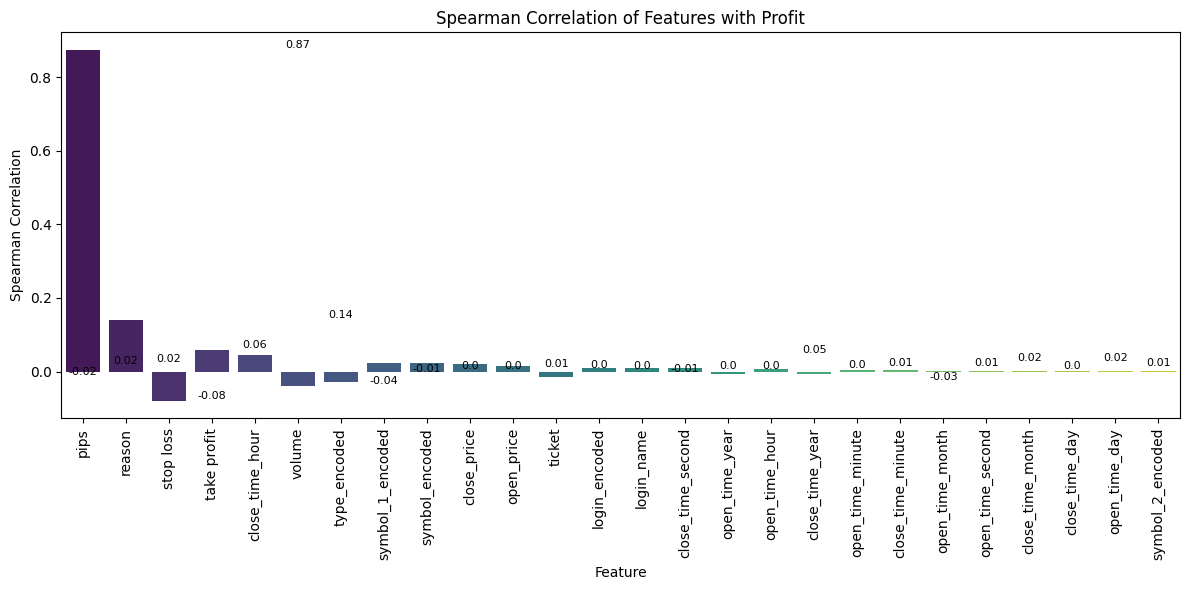

In [ ]:
from scipy.stats import pearsonr, spearmanr

numeric_cols = df_1.select_dtypes(include=np.number).columns
numeric_cols = numeric_cols.drop('profit')

results = []

for col in numeric_cols:
    pearson_corr, pearson_p = pearsonr(df_1[col], df_1['profit'])
    spearman_corr, spearman_p = spearmanr(df_1[col], df_1['profit'])

    results.append({
        'feature': col,
        'pearson_corr': pearson_corr,
        'pearson_p': pearson_p,
        'spearman_corr': spearman_corr,
        'spearman_p': spearman_p
    })

corr_df = pd.DataFrame(results)
corr_df = corr_df.sort_values(by='pearson_corr', key=abs, ascending=False)

print(corr_df)





# Sort by absolute Spearman correlation
corr_df_sorted = corr_df.sort_values(by='spearman_corr', key=abs, ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x='feature', y='spearman_corr', data=corr_df_sorted, palette='viridis')
plt.xticks(rotation=90)
plt.title('Spearman Correlation of Features with Profit')
plt.ylabel('Spearman Correlation')
plt.xlabel('Feature')

# Annotate bars with correlation values
for i, row in corr_df_sorted.iterrows():
    plt.text(i, row['spearman_corr'], round(row['spearman_corr'], 2), ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()


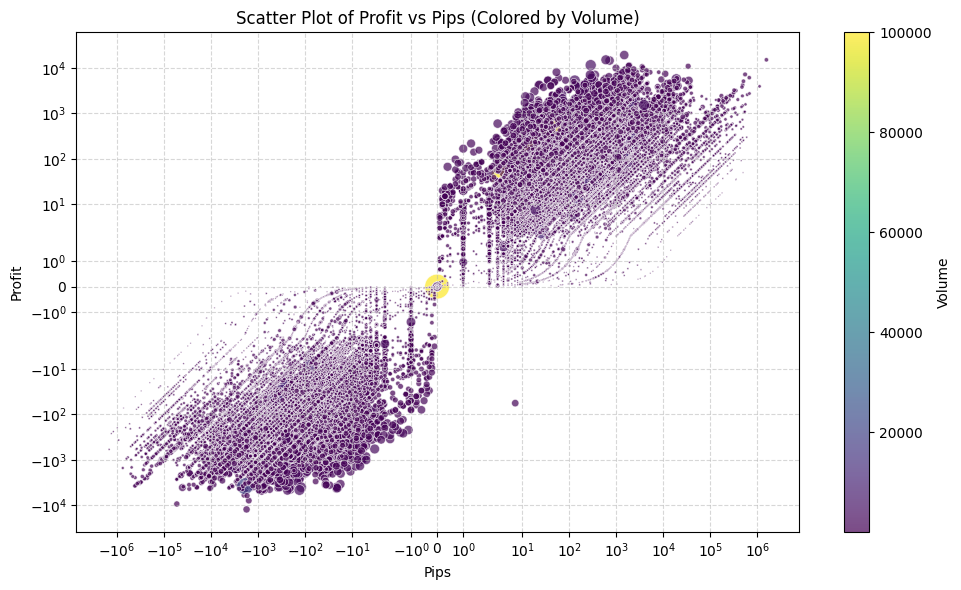

In [ ]:
heavy_tails = (df['profit'].max()/df['profit'].median() > 100) or (df['pips'].max()/df['pips'].median() > 100)

plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    df['pips'],
    df['profit'],
    c=df['volume'],
    s=np.sqrt(df['volume']),
    cmap='viridis',
    alpha=0.7,
    edgecolors='w',
    linewidth=0.5
)
plt.colorbar(scatter, label='Volume')

plt.xlabel('Pips')
plt.ylabel('Profit')
plt.title('Scatter Plot of Profit vs Pips (Colored by Volume)')

# Apply log scales if heavy tails detected
if heavy_tails:
    plt.xscale('symlog')
    plt.yscale('symlog')

plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

## anova test and Kruskal wallis test for Catagorical vs Profits relations

In [ ]:
from scipy.stats import ttest_ind, f_oneway, kruskal, shapiro

categorical_cols = [col for col in df_1.columns if 'encoded' in col or df_1[col].dtype == 'object']
results = []

for col in categorical_cols:
    groups = df_1.groupby(col)['profit'].apply(list)
    num_categories = len(groups)

    # Check normality of profit in each group
    normal = all(shapiro(group)[1] > 0.05 for group in groups)

    if num_categories == 2:
        stat, p = ttest_ind(*groups)
        test_name = 't-test'
    else:
        if normal:
            stat, p = f_oneway(*groups)
            test_name = 'ANOVA'
        else:
            stat, p = kruskal(*groups)
            test_name = 'Kruskal-Wallis'

    significance = 'Significant' if p < 0.05 else 'Not significant'

    results.append({
        'feature': col,
        'test': test_name,
        'statistic': stat,
        'p_value': p,
        'significance': significance
    })

results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='p_value')
print(results_df)


            feature            test    statistic       p_value significance
1     login_encoded  Kruskal-Wallis  3981.050555  0.000000e+00  Significant
4    symbol_encoded  Kruskal-Wallis   274.997107  1.306820e-28  Significant
2  symbol_1_encoded  Kruskal-Wallis   142.037289  1.749635e-15  Significant
3  symbol_2_encoded  Kruskal-Wallis    83.390296  2.173283e-09  Significant
0      type_encoded          t-test     5.162996  2.438110e-07  Significant


/usr/local/lib/python3.12/dist-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 32716.
  res = hypotest_fun_out(*samples, **kwds)
